# Word2Vec

Custom word2vec model

In [1]:
import pandas as pd
from gensim.models.word2vec import Word2Vec

In [6]:
master_df = pd.read_pickle("../../dataset/FakeNewsNet/data/FakeNewsNet.pkl")
master_df.head()

,text,processed_text,label
0,On Air with Ryan Seacrest is offering you a ch...,"[air, ryan, seacrest, offer, chance, win, nigh...",false
1,‘American Idol’ final: How to vote for the sea...,"[american, idol, final, vote, season, winner, ...",false
2,@ScottDisick @KrisJenner @khloekardashian — LA...,"[latest, art, shame, revenge, prank, banksy, s...",false
3,@foquinha Youngblood - 5 Seconds of Summer \nO...,"[youngblood, seconds, summer, little, mix, del...",false
4,Kylie Jenner ‘Open’ To Reconciliation With Tyg...,"[kylie, jenner, open, reconciliation, tyga, pr...",false


In [7]:
master_df['label'] = master_df['label'].apply(lambda x: 1 if x == 'true' else 0)
master_df

,text,processed_text,label
0,On Air with Ryan Seacrest is offering you a ch...,"[air, ryan, seacrest, offer, chance, win, nigh...",0
1,‘American Idol’ final: How to vote for the sea...,"[american, idol, final, vote, season, winner, ...",0
2,@ScottDisick @KrisJenner @khloekardashian — LA...,"[latest, art, shame, revenge, prank, banksy, s...",0
3,@foquinha Youngblood - 5 Seconds of Summer \nO...,"[youngblood, seconds, summer, little, mix, del...",0
4,Kylie Jenner ‘Open’ To Reconciliation With Tyg...,"[kylie, jenner, open, reconciliation, tyga, pr...",0
...,...,...,...
1368182,"@JenKirkman Hell, are you familiar with classi...","[hell, familiar, classic, hollywood, guy, like...",1
1368183,@NBCNewsPR @MeetThePress @chucktodd @RepAdamSc...,"[think, sleepy, eye, chuck, well, trunp, say, ...",1
1368184,Have you seen our Spotlight report on Initial ...,"[see, spotlight, report, initial, teacher, edu...",1
1368185,President Trump’s First Address to a Joint Ses...,"[president, trump, address, joint, session, co...",1


In [8]:
corpus = master_df['processed_text']
corpus.head()

0    [air, ryan, seacrest, offer, chance, win, nigh...
1    [american, idol, final, vote, season, winner, ...
2    [latest, art, shame, revenge, prank, banksy, s...
3    [youngblood, seconds, summer, little, mix, del...
4    [kylie, jenner, open, reconciliation, tyga, pr...
Name: processed_text, dtype: object

In [27]:
import pandas as pd

# Load data (LIAR Dataset)
data_df_train_raw = pd.read_csv("../../dataset/LIAR/data/train.csv", sep=",", header=0)
data_df_test_raw = pd.read_csv("../../dataset/LIAR/data/test.csv", sep=",", header=0)
data_df_valid_raw = pd.read_csv("../../dataset/LIAR/data/valid.csv", sep=",", header=0)

# Merge all data
liar_df = pd.concat(
    [data_df_train_raw, data_df_test_raw, data_df_valid_raw], ignore_index=True
)
print(liar_df.shape)
liar_df.head(5)

liar_df['label'] = liar_df['label'].apply(lambda x: 1 if x else 0)

liar_df

(12791, 15)


,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,statement_processed
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say Annies List political group support trimes...
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natural gas take star...
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Hillary Clinton agree John McCain vote George ...
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation likely mandate ...
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,economic turnaround start end term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,3419.json,1,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference,time decade import account half oil consume
12787,12548.json,1,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,say Donald Trump bankrupt company twice time
12788,401.json,1,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0.0,1.0,0.0,2.0,0.0,a television ad,John McCain George Bush absolutely plan univer...
12789,1055.json,0,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.,new poll show 62 percent support president pla...


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_cf(y, pred_y, title):
    conf_matrix = confusion_matrix(y, pred_y)

    fig, ax = plt.subplots()

    sns.heatmap(conf_matrix, annot=True, fmt='g')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.title(title)
    
    return plt

## Custom Word2Vec Model Training

In [9]:
# Total number of word
from functools import reduce

word_count = reduce(lambda acc, cur: len(cur) + acc, corpus.to_list(), 0)

print("total word count: ", word_count)


total word count:  15718897


In [10]:
model = Word2Vec(corpus)


In [11]:
model.save('word2vec_default.model')
model = Word2Vec.load('word2vec_default.model')

In [12]:
# https://www.kaggle.com/code/jerrykuo7727/word2vec
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, word + '_cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [13]:
most_similar(model, ["vote"])

,vote,vote_cos
0,voting,0.747489
1,voteblue,0.617175
2,dem,0.593097
3,democrats,0.584387
4,repub,0.573368
5,gerrymandering,0.568581
6,majority,0.567342
7,alpha,0.566582
8,progressive,0.560133
9,round,0.559119


### Training and Tuning

In [14]:
model_500_5 = Word2Vec(corpus, vector_size=500, epochs=5, workers=23)
model_500_5.save('word2vec_500_5.model')

In [15]:
model_500_6 = Word2Vec(corpus, vector_size=500, epochs=6, workers=23)
model_500_6.save('word2vec_500_6.model')

In [16]:
model_500_7 = Word2Vec(corpus, vector_size=500, epochs=7, workers=23)
model_500_7.save('word2vec_500_7.model')

In [17]:
model_500_10 = Word2Vec(corpus, vector_size=500, epochs=10, workers=23)
model_500_10.save('word2vec_500_10.model')

In [18]:
model_500_sg = Word2Vec(corpus, vector_size=500, epochs=5, workers=23)
model_500_sg.save('word2vec_500_sg.model')

In [19]:
model_250 = Word2Vec(corpus, vector_size=250, epochs=7, workers=23)
model_250.save('word2vec_250.model')

In [20]:
keywords =  ["breaking", "apple", "human", "vote", "vehicle", "automobile", "accident"]

In [21]:
most_similar(model_500_5, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,exchanges,0.431950,sist,0.409129,humanright,0.481510,voting,0.595933,truck,0.594697,import,0.443190,autonews,0.492163
1,parsian,0.418624,fea,0.393780,being,0.471736,voteblue,0.482180,car,0.539510,importer,0.438274,pools,0.470400
2,cyprium,0.403161,proponent,0.386647,genocide,0.430455,voter,0.477077,fatality,0.526049,subsidy,0.425427,injure,0.465672
3,buzzort,0.389579,juice,0.375269,ability,0.406104,dem,0.476851,mph,0.523085,manufacture,0.419941,atv,0.463089
4,buzzybuzz,0.381990,pharma,0.373842,compassion,0.402467,majority,0.451466,motorcycle,0.514975,agricultural,0.413930,car,0.462839
5,lfn,0.378017,gadget,0.361838,humanity,0.401442,wynonnaearp,0.434605,firearm,0.506811,lng,0.400212,crash,0.451849
6,chelynn,0.373347,unifo,0.354343,basic,0.401313,votethemout,0.431326,injure,0.497796,export,0.379051,windows,0.440064
7,zonamya,0.370584,grandkids,0.352628,individual,0.397430,clexa,0.425690,fatal,0.485379,natga,0.375683,vehicle,0.430771
8,urbannews,0.366154,bows,0.351811,constitutional,0.396349,progressive,0.419596,pedestrian,0.480837,electric,0.372422,explosions,0.414791
9,stockmarket,0.361023,politi,0.343672,flesh,0.393477,ballot,0.418796,helicopter,0.479109,dairy,0.369394,moped,0.408904


In [22]:
most_similar(model_500_6, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,exchanges,0.451322,proponent,0.391598,humanright,0.448522,voting,0.586194,truck,0.567811,agricultural,0.452789,pools,0.476259
1,cyprium,0.420815,sist,0.389366,genocide,0.432502,voter,0.472058,fatality,0.506022,importer,0.434107,car,0.465198
2,dubstep,0.383725,juice,0.387339,being,0.419016,dem,0.470329,mph,0.505198,import,0.430065,autonews,0.452431
3,lfn,0.382842,bows,0.366928,nature,0.396459,voteblue,0.442768,car,0.504057,subsidy,0.423299,atv,0.451641
4,buzzybuzz,0.375294,fea,0.365559,flesh,0.395591,majority,0.423740,firearm,0.488555,dairy,0.395887,moped,0.439882
5,buzzort,0.370305,unifo,0.354235,individual,0.392701,luciferonnetflix,0.415832,injure,0.488315,manufacture,0.394039,injures,0.436089
6,zonamya,0.367628,gulp,0.349235,dignity,0.376772,democrat,0.415022,helicopter,0.484166,exports,0.391561,crash,0.430522
7,parsian,0.361093,politi,0.345018,decency,0.373080,gerrymandering,0.414600,motorcycle,0.482073,petroleum,0.390799,vehicle,0.421060
8,urbannews,0.352154,pharma,0.342517,basic,0.367810,wynonnaearp,0.412923,aircraft,0.476951,permianbasin,0.388014,windows,0.413209
9,learnfromnazrul,0.334666,soundtrack,0.340554,palestinians,0.367477,ballot,0.409687,taxi,0.454389,export,0.387807,motorcycle,0.410083


In [23]:
most_similar(model_500_7, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,cyprium,0.417110,bows,0.386562,humanright,0.453385,voting,0.579045,truck,0.569434,import,0.441111,pools,0.475353
1,exchanges,0.376808,sist,0.383705,being,0.422198,voter,0.472307,fatality,0.500200,agricultural,0.424880,atv,0.455359
2,learnfromnazrul,0.369430,proponent,0.383214,compassion,0.386035,voteblue,0.445859,car,0.472225,manufacture,0.422592,crash,0.433493
3,buzzort,0.368077,juice,0.379432,genocide,0.383596,dem,0.435684,bmw,0.458284,currency,0.406150,autonews,0.430897
4,buzzybuzz,0.365229,pharma,0.378827,cosmic,0.370309,votethemout,0.398713,firearm,0.457044,industrial,0.402542,car,0.402395
5,lfn,0.363843,unifo,0.371144,basic,0.362164,trixie,0.397795,injure,0.456373,importation,0.397189,explosions,0.401867
6,urbannews,0.358686,fea,0.365160,flesh,0.357617,ballot,0.395838,helicopter,0.455206,vw,0.394747,bikes,0.400515
7,ecig,0.355763,importer,0.340336,humanity,0.357153,bluewave,0.393000,highway,0.444737,subsidy,0.392262,moped,0.393038
8,dubstep,0.355702,gadget,0.339310,empathy,0.356622,democrat,0.386596,motorcycle,0.441032,emit,0.388190,injure,0.389615
9,zonamya,0.355580,crawf,0.333585,beings,0.356444,majority,0.385234,fatal,0.438302,automotive,0.381491,windows,0.388886


In [24]:
most_similar(model_500_10, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,lates,0.366678,juice,0.387695,humanright,0.394122,voting,0.560387,truck,0.520760,electric,0.419154,autonews,0.437914
1,exchanges,0.355420,proponent,0.352485,flesh,0.365705,voter,0.464663,car,0.473037,natga,0.419024,pools,0.390601
2,cyprium,0.355000,fea,0.349263,animal,0.354747,dem,0.427495,injure,0.444874,agricultural,0.395915,atv,0.384690
3,buzzybuzz,0.342462,clp,0.337122,being,0.352517,ballot,0.417001,aircraft,0.444195,solarenergy,0.389569,crash,0.382622
4,lfn,0.341803,pharma,0.331514,humanity,0.346635,wynonnaearp,0.393260,pedestrian,0.437748,permianbasin,0.384486,bikes,0.380455
5,buzzort,0.335275,sist,0.321547,cosmic,0.345080,voteblue,0.384271,highway,0.431779,import,0.376725,moped,0.366665
6,urbannews,0.334223,unifo,0.320245,compassion,0.344227,senate,0.379632,taxi,0.430734,agri,0.358831,explosions,0.354543
7,newscommentary,0.334071,enviro,0.316882,torture,0.343376,democrat,0.378541,fatality,0.425202,industrial,0.355687,injure,0.348176
8,parsian,0.323678,bows,0.316619,genocide,0.339422,democrats,0.376923,motorcycle,0.416653,petroleum,0.354863,injures,0.331062
9,loweel,0.314764,gulp,0.311935,individual,0.330569,dems,0.373403,suv,0.414147,renewable,0.353770,autos,0.330949


In [25]:
most_similar(model, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,exchanges,0.488128,iheart,0.455893,being,0.710782,voting,0.747489,truck,0.668646,agri,0.652869,pools,0.543593
1,cyprium,0.482224,juice,0.454704,humanright,0.645096,voteblue,0.617175,firearm,0.657361,lucrative,0.638427,car,0.535835
2,wiretapping,0.463972,chunk,0.446621,capable,0.622547,dem,0.593097,aircraft,0.629527,agricultural,0.625198,injure,0.526254
3,yahoo,0.462682,shoutout,0.431806,decency,0.619823,democrats,0.584387,helicopter,0.604545,importer,0.614009,autonews,0.512990
4,buzzort,0.457759,spender,0.426911,discriminate,0.584331,repub,0.573368,car,0.603918,subsidy,0.607950,overdose,0.501816
5,newscommentary,0.447752,freaky,0.425884,trafficker,0.564790,gerrymandering,0.568581,fatality,0.601460,mfg,0.600892,motorcycle,0.498443
6,ecig,0.446884,fea,0.414179,constitutional,0.562390,majority,0.567342,airline,0.598165,barter,0.599268,windows,0.495608
7,handcuffs,0.446531,tremendously,0.413086,genocide,0.559361,alpha,0.566582,bmw,0.584674,aluminium,0.597032,vehicle,0.494980
8,pib,0.445314,extra,0.411081,instinct,0.554066,progressive,0.560133,fatal,0.575267,quantity,0.591447,crash,0.493402
9,dubstep,0.441022,unifo,0.410544,unnecessary,0.550904,round,0.559119,injure,0.570647,acquire,0.590824,shaken,0.483363


In [26]:
most_similar(model_250, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,exchanges,0.477914,juice,0.408924,humanright,0.452814,voting,0.630313,truck,0.604700,importer,0.506292,autonews,0.483083
1,cyprium,0.428150,grandkids,0.395393,flesh,0.437524,voter,0.538862,aircraft,0.557630,agricultural,0.439230,pools,0.469523
2,urbannews,0.397750,proponent,0.382921,being,0.436738,dem,0.496898,car,0.534493,bmw,0.438995,injure,0.449541
3,parsian,0.397419,pharma,0.376764,genocide,0.426945,ballot,0.489146,firearm,0.511165,import,0.427915,crash,0.446808
4,lfn,0.394320,sist,0.374836,capable,0.416891,voteblue,0.486532,construction,0.498665,subsidy,0.420342,bikes,0.446664
5,buzzort,0.390383,clp,0.355710,animal,0.413239,democrat,0.462913,injure,0.497526,lng,0.417525,explosions,0.438444
6,zonamya,0.389308,bows,0.353340,cosmic,0.404452,votethemout,0.455310,highway,0.494641,exporter,0.408652,atv,0.429930
7,buzzybuzz,0.386441,unifo,0.351234,individual,0.402828,elect,0.449176,bmw,0.493189,cda,0.400577,car,0.426906
8,loweel,0.382236,yin,0.349385,internationally,0.399774,senate,0.445651,mph,0.488544,sov,0.400026,shaken,0.416937
9,starnewsvision,0.368528,fea,0.346772,traffickers,0.396112,endorse,0.435845,motorcycle,0.487688,export,0.399263,moped,0.410932


## Evaluation

In [29]:
def evaluate_model(per_list):
    result = list(map(lambda x: {"section": x["section"], "correct": len(x["correct"]), "incorrect": len(x["incorrect"]), "score": len(x["correct"]) / sum([len(x["correct"]), len(x["incorrect"])])}, per_list))
    return pd.DataFrame(result)


In [30]:
# load model
model = Word2Vec.load('word2vec.model')

In [31]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
from gensim.test.utils import datapath

performance = model.wv.evaluate_word_analogies(datapath("questions-words.txt"))

evaluate_model(performance[1])

,section,correct,incorrect,score
0,capital-common-countries,26,480,0.051383
1,capital-world,31,1132,0.026655
2,currency,3,105,0.027778
3,city-in-state,47,2089,0.022004
4,family,51,369,0.121429
5,gram1-adjective-to-adverb,3,753,0.003968
6,gram2-opposite,4,548,0.007246
7,gram3-comparative,0,812,0.000000
8,gram4-superlative,7,455,0.015152
9,gram5-present-participle,2,418,0.004762


In [32]:
"""
    https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
    
    By default it uses an academic dataset WS-353 but one can create a dataset specific to your business based on it. 
    It contains word pairs together with human-assigned similarity judgments. 
    It measures the relatedness or co-occurrence of two words. 
    For example, "coast" and "shore" are very similar as they appear in the same context. 
    At the same time "clothes" and "closet" are less similar because they are related but not interchangeable.
"""

performance = model.wv.evaluate_word_pairs(datapath("wordsim353.tsv"))

performance


(PearsonRResult(statistic=0.4204846258732877, pvalue=5.892258116329609e-16),
 SignificanceResult(statistic=0.41038243234266253, pvalue=3.333367458275454e-15),
 3.9660056657223794)

In [33]:
model.save('word2vec.model')

## Visualize

In [ ]:
# TODO

## Classification Model Training

In [34]:
import numpy as np
import pandas as pd
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split

In [9]:
# Check maxinum length of data
from functools import reduce

max_len = reduce(lambda acc, cur: len(cur) if len(cur) > acc else acc, master_df['processed_text'], 0)
print("maximun length of sentence: ", max_len)

maximun length of sentence:  55


In [35]:
model = Word2Vec.load('word2vec.model')

### Classify by sentence vector

In [55]:
processed_df = master_df.copy()

In [56]:
processed_df = processed_df[processed_df["processed_text"].map(len) > 0]

Ref: https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381

In [66]:
words = set(model.wv.index_to_key)

vect = [np.array([model.wv[i] for i in ls if i in words]) for ls in processed_df["processed_text"]]


In [104]:
vect_avg = []
for v in vect:
    if v.size:
        vect_avg.append(v.mean(axis=0))
    else:
        vect_avg.append(np.zeros(model.wv.vector_size, dtype=np.float32))

In [105]:
processed_df['vect_avg'] = vect_avg

In [118]:
processed_df['label_num'] = processed_df['label'].apply(lambda x: 1 if x == "true" else 0)

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vect_avg, processed_df['label_num'], test_size=0.2)

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-2)
rf_model = rf.fit(X_train, y_train)

In [121]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     86626
           1       0.94      0.97      0.96    186883

    accuracy                           0.94    273509
   macro avg       0.94      0.92      0.93    273509
weighted avg       0.94      0.94      0.94    273509



In [127]:
pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

,y_test,y_pred
322223,0,0
725661,1,1
584995,1,1
1328841,1,1
1227055,1,0
...,...,...
1300786,1,1
1197368,1,1
458891,1,1
562862,1,1


### RNN Model

In [129]:
rnn_df = master_df.copy()

In [134]:
embedding_matrix = np.zeros((len(model.wv.index_to_key) + 1, model.vector_size))
word2idx = {}

vocab_list = [(word, model.wv[word]) for word in model.wv.index_to_key]
for i, vocab in enumerate(vocab_list):
    word, vec = vocab
    embedding_matrix[i + 1] = vec
    word2idx[word] = i + 1

In [140]:
from keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    trainable=False,
)


In [154]:
from keras.utils import pad_sequences

PADDING_LENGTH = max_len
supported_words = set(model.wv.index_to_key)

text_index = [[model.wv.key_to_index[word] if word in supported_words else 0 for word in sentence] for sentence in rnn_df.processed_text]
text_index = pad_sequences(text_index, maxlen=PADDING_LENGTH)


In [158]:
print(text_index.shape)
text_index[0]

(1368187, 55)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  496,  140,  926,  831,
        655,  136,   63,  140,  211, 2023, 3211,  936, 1388,  655, 3059],
      dtype=int32)

In [173]:
y = rnn_df['label'].apply(lambda x: 1 if x == "true" else 0)

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_index, y, test_size=0.2)

(len(X_train), len(X_test), y_train.shape, y_test.shape)

(1094549, 273638, (1094549,), (273638,))

#### Model

In [217]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, GRU
import datetime


In [1]:
rnn = Sequential()
rnn.add(embedding_layer)
rnn.add(GRU(128, dropout=0.2, return_sequences=True))
rnn.add(GRU(64, dropout=0.2, return_sequences=True))
rnn.add(GRU(32))
rnn.add(Dense(32, activation="relu"))
rnn.add(Dense(16, activation="relu"))
rnn.add(Dense(1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
rnn.summary()


NameError: name 'Sequential' is not defined

#### TensorBoard

In [219]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
ckpt = tf.keras.callbacks.ModelCheckpoint('./model.h5', monitor='val_loss', save_best_only=True, mode='auto')
board = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1, embeddings_freq=1)

callbacks = [earlyStopping, ckpt, board]

In [221]:
result = rnn.fit(x=X_train, y=y_train, batch_size=3000, epochs=10000, validation_split=0.2, callbacks=callbacks)


Epoch 1/10000
292/292 [==============================] - 16s 55ms/step - loss: 0.3349 - accuracy: 0.8557 - val_loss: 0.2488 - val_accuracy: 0.8969
Epoch 2/10000
292/292 [==============================] - 15s 51ms/step - loss: 0.2772 - accuracy: 0.8834 - val_loss: 0.2056 - val_accuracy: 0.9171
Epoch 3/10000
292/292 [==============================] - 15s 50ms/step - loss: 0.2486 - accuracy: 0.8967 - val_loss: 0.1848 - val_accuracy: 0.9259
Epoch 4/10000
292/292 [==============================] - 14s 48ms/step - loss: 0.2305 - accuracy: 0.9049 - val_loss: 0.1693 - val_accuracy: 0.9327
Epoch 5/10000
292/292 [==============================] - 14s 47ms/step - loss: 0.2179 - accuracy: 0.9104 - val_loss: 0.1587 - val_accuracy: 0.9366
Epoch 6/10000
292/292 [==============================] - 14s 48ms/step - loss: 0.2081 - accuracy: 0.9151 - val_loss: 0.1515 - val_accuracy: 0.9396
Epoch 7/10000
292/292 [==============================] - 14s 48ms/step - loss: 0.2002 - accuracy: 0.9188 - val_loss: 0

In [240]:
results = rnn.evaluate(X_test, y_test, batch_size=3000, return_dict=True)

92/92 [==============================] - 2s 17ms/step - loss: 0.1039 - accuracy: 0.9579


In [242]:
print("Testing", results)

Testing {'loss': 0.10392937809228897, 'accuracy': 0.957915186882019}


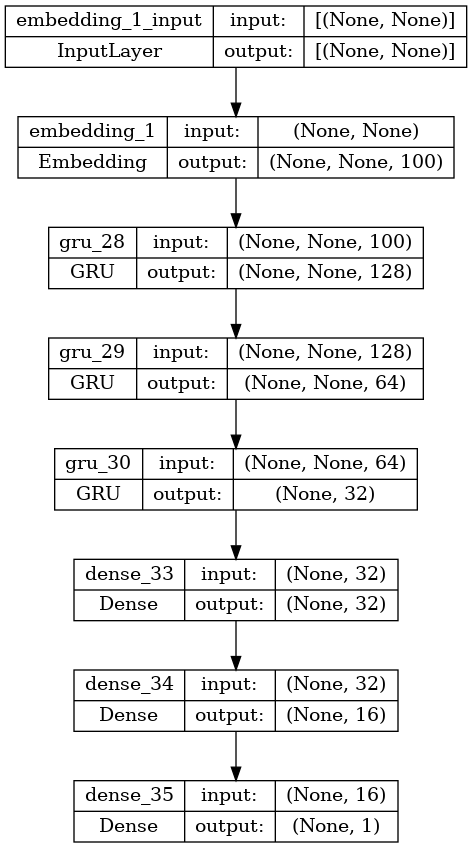

In [229]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)

from keras.utils import plot_model

plot_model(rnn, "rnn_model.png", show_shapes=True)

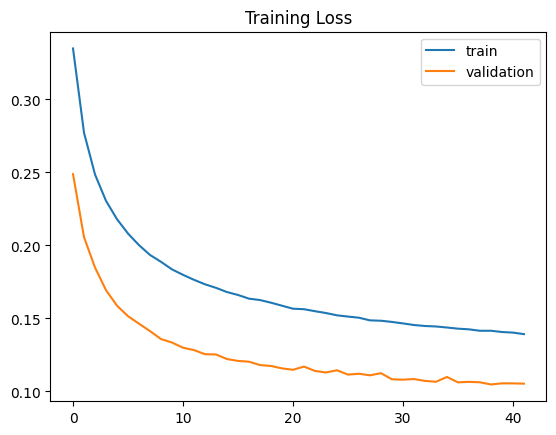

In [238]:
# Plot loss graph
import matplotlib.pyplot as plt

plt.title('Training Loss')
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right')

plt.savefig('./rnn_model_loss.png')

## Machine Learning Approach

In [36]:
pretrained_model = model

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Ticket Data
master_df["concat_text"] = master_df["processed_text"].apply(lambda x: " ".join(x))

corpus = master_df["concat_text"].values

# Creating the vectorizer
vectorizer = CountVectorizer()

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

# print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
vector_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(vector_df.shape)
vector_df.head(5)


MemoryError: Unable to allocate 1.65 TiB for an array with shape (1368187, 165903) and data type int64

In [ ]:
coprus_vector = vector_df.columns


def get_similarity_from_pretrained_model(inpTextData):
    vector = vectorizer.transform(inpTextData)
    vec_count = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

    w2v = pd.DataFrame()

    for i in range(vec_count.shape[0]):
        # Zero Padding
        Sentence = np.zeros(300) 

        for word in coprus_vector[vec_count.iloc[i, :] >= 1]:
            if word in model.key_to_index.keys():
                Sentence = Sentence + model[word]
        w2v = w2v.append(pd.DataFrame([Sentence]))
    return w2v


In [ ]:
X_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
result_rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
# save model
from joblib import dump
dump(result_rf, 'w2v_clf_rf.joblib')

['w2v_clf_rf.joblib']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, result_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1944
           1       0.77      0.83      0.80      2056

    accuracy                           0.78      4000
   macro avg       0.79      0.78      0.78      4000
weighted avg       0.79      0.78      0.78      4000



<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

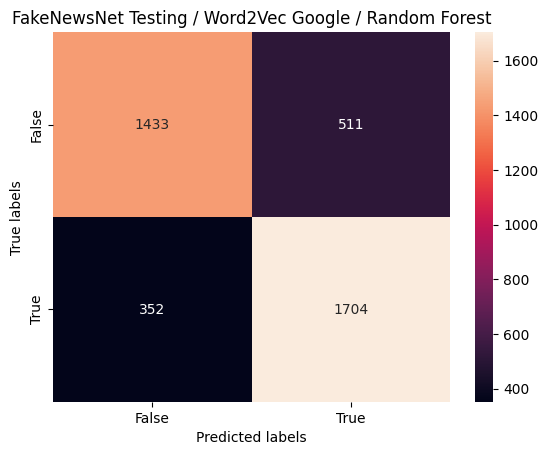

In [ ]:
plot_cf(y_test, result_rf.predict(X_test), 'FakeNewsNet Testing / Word2Vec Google / Random Forest')

In [ ]:
print(classification_report(master_df['label'], result_rf.predict(liar_w2v_X)))

              precision    recall  f1-score   support

           0       0.44      0.82      0.57      5657
           1       0.54      0.17      0.25      7134

    accuracy                           0.46     12791
   macro avg       0.49      0.49      0.41     12791
weighted avg       0.50      0.46      0.40     12791



<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

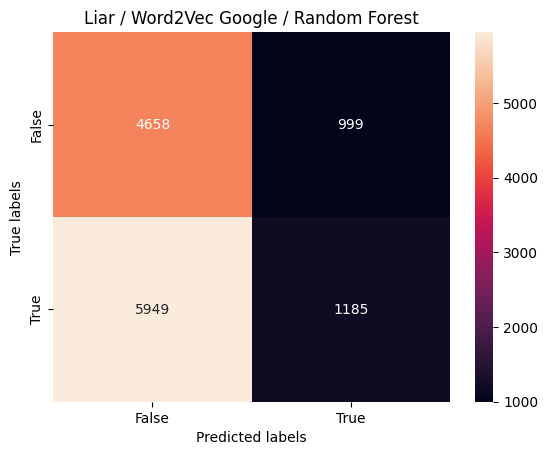

In [ ]:
plot_cf(master_df['label'], result_rf.predict(liar_w2v_X), 'Liar / Word2Vec Google / Random Forest')